In [19]:
import soundfile # to read audio file
import numpy as np
import librosa # to extract speech features
import glob
import os
import matplotlib.pyplot as plt
import pickle # to save model after training
from sklearn.model_selection import train_test_split # for splitting training and testing
from sklearn.neural_network import MLPClassifier # multi-layer perceptron model
from sklearn.metrics import accuracy_score # to measure how good we are

In [2]:
def extract_feature(file_name, **kwargs):
    """
    Extract feature from audio file `file_name`
        Features supported:
            - MFCC (mfcc)
            - Chroma (chroma)
            - MEL Spectrogram Frequency (mel)
            - Contrast (contrast)
            - Tonnetz (tonnetz)
        e.g:
        `features = extract_feature(path, mel=True, mfcc=True)`
    """
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        if chroma or contrast:
            stft = np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result = np.hstack((result, mel))
        if contrast:
            contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, contrast))
        if tonnetz:
            tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
            result = np.hstack((result, tonnetz))
    return result

In [3]:
int2emotion = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# we allow only these emotions 
AVAILABLE_EMOTIONS = {
    "angry",
    "sad",
    "neutral",
    "happy"
}

def load_data(test_size=0.2):
    X, y = [], []
    for file in glob.glob("data/Actor_*/*.wav"):
        # get the base name of the audio file
        basename = os.path.basename(file)
        # get the emotion label
        emotion = int2emotion[basename.split("-")[2]]
        # we allow only AVAILABLE_EMOTIONS we set
        if emotion not in AVAILABLE_EMOTIONS:
            continue
        # extract speech features
        features = extract_feature(file, mfcc=True, chroma=True, mel=True)
        # add to data
        X.append(features)
        y.append(emotion)
    # split the data to training and testing and return it
    return train_test_split(np.array(X), y, test_size=test_size, random_state=7)

In [4]:
# load RAVDESS dataset, 75% training 25% testing
X_train, X_test, y_train, y_test = load_data(test_size=0.25)

C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users

C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 6.1035156e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00042725 -0.00039673
 -0.00033569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  2.7465820e-04
  3.0517578e-04  2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.featu

C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 6.1035156e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[-1.5258789e-04 -1.5258789e-04 -1.5258789e-04 ...  0.0000000e+00
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...  3.0517578e-05
  6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[ 6.1035156e-05  3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05  0.0000000e+00  3.0517578e-05 ...  2.7465820e-04
  2.4414062e-04  2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  6.1035156e-05
  9.1552734e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel

C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[-9.1552734e-05 -6.1035156e-05 -6.1035156e-05 ...  6.1035156e-05
  3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[ 9.1552734e-05  9.1552734e-05  9.1552734e-05 ... -3.6621094e-04
 -3.6621094e-04 -3.6621094e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -6.1035156e-05 ... -2.7465820e-04
 -2.1362305e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel

C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05 -3.0517578e-05 -2.1362305e-04 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[-1.5258789e-04  6.1035156e-05  1.5258789e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel

C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00021362 -0.00024414
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa

C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 1.2207031e-04 1.2207031e-04
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00210571 -0.00216675
 -0.0020752 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.featu

C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-04  3.3569336e-04  3.0517578e-04 ... -9.1552734e-05
 -9.1552734e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel

C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[-0.00018311 -0.00018311 -0.00021362 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[ 1.2207031e-04  1.2207031e-04  1.2207031e-04 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[0.         0.         0.         ... 0.00308228 0.00311279 0.00308228] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sam

C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_16540\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

In [5]:
# print some details
# number of samples in training data
print("[+] Number of training samples:", X_train.shape[0])
# number of samples in testing data
print("[+] Number of testing samples:", X_test.shape[0])
# number of features used
# this is a vector of features extracted 
# using extract_features() function
print("[+] Number of features:", X_train.shape[1])

[+] Number of training samples: 504
[+] Number of testing samples: 168
[+] Number of features: 180


In [6]:
# best model, determined by a grid search
model_params = {
    'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (300,), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}

In [7]:
# initialize Multi Layer Perceptron classifier
# with best parameters ( so far )
model = MLPClassifier(**model_params)

In [8]:
# train the model
print("[*] Training the model...")
model.fit(X_train, y_train)

[*] Training the model...


MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [9]:
# predict 25% of data to measure how good we are
y_pred = model.predict(X_test)

# calculate the accuracy
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 75.60%


In [10]:
# now we save the model
# make result directory if doesn't exist yet
if not os.path.isdir("result"):
    os.mkdir("result")

pickle.dump(model, open("result/mlp_classifier.model", "wb"))

In [12]:
import pyaudio
import os
import wave
import pickle
from sys import byteorder
from array import array
from struct import pack
from sklearn.neural_network import MLPClassifier

from utils import extract_feature

THRESHOLD = 500
CHUNK_SIZE = 1024
FORMAT = pyaudio.paInt16
RATE = 16000

SILENCE = 30

def is_silent(snd_data):
    "Returns 'True' if below the 'silent' threshold"
    return max(snd_data) < THRESHOLD

def normalize(snd_data):
    "Average the volume out"
    MAXIMUM = 16384
    times = float(MAXIMUM)/max(abs(i) for i in snd_data)

    r = array('h')
    for i in snd_data:
        r.append(int(i*times))
    return r

def trim(snd_data):
    "Trim the blank spots at the start and end"
    def _trim(snd_data):
        snd_started = False
        r = array('h')

        for i in snd_data:
            if not snd_started and abs(i)>THRESHOLD:
                snd_started = True
                r.append(i)

            elif snd_started:
                r.append(i)
        return r

    # Trim to the left
    snd_data = _trim(snd_data)

    # Trim to the right
    snd_data.reverse()
    snd_data = _trim(snd_data)
    snd_data.reverse()
    return snd_data

def add_silence(snd_data, seconds):
    "Add silence to the start and end of 'snd_data' of length 'seconds' (float)"
    r = array('h', [0 for i in range(int(seconds*RATE))])
    r.extend(snd_data)
    r.extend([0 for i in range(int(seconds*RATE))])
    return r

def record():
    """
    Record a word or words from the microphone and 
    return the data as an array of signed shorts.
    Normalizes the audio, trims silence from the 
    start and end, and pads with 0.5 seconds of 
    blank sound to make sure VLC et al can play 
    it without getting chopped off.
    """
    p = pyaudio.PyAudio()
    stream = p.open(format=FORMAT, channels=1, rate=RATE,
        input=True, output=True,
        frames_per_buffer=CHUNK_SIZE)

    num_silent = 0
    snd_started = False

    r = array('h')

    while 1:
        # little endian, signed short
        snd_data = array('h', stream.read(CHUNK_SIZE))
        if byteorder == 'big':
            snd_data.byteswap()
        r.extend(snd_data)

        silent = is_silent(snd_data)

        if silent and snd_started:
            num_silent += 1
        elif not silent and not snd_started:
            snd_started = True

        if snd_started and num_silent > SILENCE:
            break

    sample_width = p.get_sample_size(FORMAT)
    stream.stop_stream()
    stream.close()
    p.terminate()

    r = normalize(r)
    r = trim(r)
    r = add_silence(r, 0.5)
    return sample_width, r

def record_to_file(path):
    "Records from the microphone and outputs the resulting data to 'path'"
    sample_width, data = record()
    data = pack('<' + ('h'*len(data)), *data)

    wf = wave.open(path, 'wb')
    wf.setnchannels(1)
    wf.setsampwidth(sample_width)
    wf.setframerate(RATE)
    wf.writeframes(data)
    wf.close()



if __name__ == "__main__":
    # load the saved model (after training)
    model = pickle.load(open("result/mlp_classifier.model", "rb"))
    print("Please talk")
    filename = "test.wav"
    # record the file (start talking)
    record_to_file(filename)
    # extract features and reshape it
    features = extract_feature(filename, mfcc=True, chroma=True, mel=True).reshape(1, -1)
    # predict
    result = model.predict(features)[0]
    # show the result !
    print("result:", result)


Please talk
result: happy


D:\Python\data\utils.py:58: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


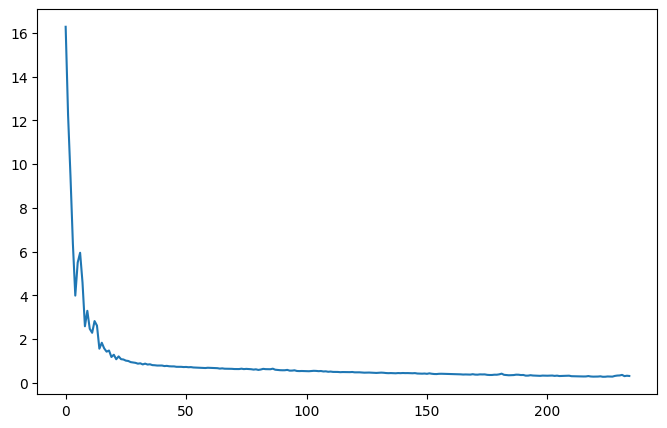

In [20]:
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(model.loss_curve_)